# Data Science Programming Assignment

Submitted by: Gargi Sharma

Student ID: 210254217

# M1
### A short summary of the dataset.

What we would like to have here is the list of columns in each database and their datatypes; along with the shape of each database and statistical inference which can be drawn out of each.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
proteins = pd.read_csv("proteins.csv")
proteins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14194 entries, 0 to 14193
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TSeq_seqtype   14194 non-null  object
 1   TSeq_accver    13985 non-null  object
 2   TSeq_taxid     14194 non-null  int64 
 3   TSeq_orgname   14194 non-null  object
 4   TSeq_defline   14194 non-null  object
 5   TSeq_length    14194 non-null  int64 
 6   TSeq_sequence  14194 non-null  object
 7   UID            14194 non-null  object
 8   DB             14194 non-null  object
 9   TSeq_sid       1236 non-null   object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [3]:
epitopes = pd.read_csv("Sp_epitopes.csv")
epitopes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   pubmed_id       7105 non-null   int64 
 1   year            7105 non-null   int64 
 2   epit_name       7105 non-null   object
 3   epitope_id      7105 non-null   int64 
 4   evid_code       7104 non-null   object
 5   epit_struc_def  7105 non-null   object
 6   sourceOrg_id    7105 non-null   int64 
 7   protein_id      7105 non-null   object
 8   epit_seq        7105 non-null   object
 9   start_pos       7105 non-null   int64 
 10  end_pos         7105 non-null   int64 
 11  n_assays        7105 non-null   int64 
 12  host_id         7105 non-null   object
 13  bcell_id        7105 non-null   object
 14  assay_type      7105 non-null   object
 15  n_Positive      7105 non-null   int64 
 16  n_Negative      7105 non-null   int64 
 17  assay_class     7105 non-null   object
dtypes: int64

We import the dataset and read it as a csv file. We use info() command to extract all the necessary information about the given datasets. We can see a detailed analysis regarding all the rows in the 2 datasets. We will exploit all these details further in the assignment.

In [4]:
epitopes.shape

(7105, 18)

In [5]:
proteins.shape

(14194, 10)

Proteins dataset has 14194 rows and 10 columns while Sp_epitopes has 7105 rows and 18 columns.

In [6]:
epitopes.describe()

,pubmed_id,year,epitope_id,sourceOrg_id,start_pos,end_pos,n_assays,n_Positive,n_Negative
count,7.105000e+03,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000,7105.000000
mean,2.662528e+07,2015.682336,512126.174806,2158.855735,310.544265,324.584659,1.005348,0.043350,0.961999
std,2.210198e+06,2.471744,63823.520147,15902.596912,249.941165,249.943675,0.099121,0.232691,0.191213
min,2.677144e+06,1989.000000,263.000000,1314.000000,1.000000,15.000000,1.000000,0.000000,0.000000
25%,2.691165e+07,2016.000000,515323.000000,1314.000000,119.000000,133.000000,1.000000,0.000000,1.000000
50%,2.691165e+07,2016.000000,520794.000000,1314.000000,258.000000,272.000000,1.000000,0.000000,1.000000
75%,2.691165e+07,2016.000000,525262.000000,1314.000000,426.000000,440.000000,1.000000,0.000000,1.000000
max,3.178798e+07,2019.000000,956369.000000,301449.000000,1168.000000,1182.000000,5.000000,4.000000,1.000000


In [7]:
proteins.describe()

,TSeq_taxid,TSeq_length
count,1.419400e+04,14194.000000
mean,7.125339e+04,731.372974
std,2.240602e+05,984.979330
min,0.000000e+00,9.000000
25%,9.606000e+03,266.000000
50%,9.606000e+03,468.000000
75%,1.114900e+04,833.000000
max,2.768764e+06,35991.000000


We analyse the 2 datasets.

# M2
### Adequately join the protein sequences onto the epitopes table 

As we proceed further with the two given datasets, we would very much like to draw conclusions if these two are related and are treated as one table instead of two and it would make things easier. We find that both these table have a common column but with different column names. So, we merge them on these columns while temporarily making a new column for our own convenience(which we drop in the next question) to drop null values.

In [8]:
pro_epi = pd.merge(left = epitopes, right = proteins, how = 'left', left_on = "protein_id", right_on = "UID") # [13]
pro_epi.shape 

(7105, 28)

In [9]:
pro_epi['protein_id - UID'] = pro_epi['protein_id'].str.cat(pro_epi[["UID"]], sep = "-") # [2]
pro_epi.shape

(7105, 29)

Here, first we join the two datasets on the same column which has 2 different names in each table. On a temporary basis, we make a new column which stores the concated strings of protein id and uid. But then we drop this column in M3(bcs my friend told me its redundant).  [13], [2]

# M3
### Remove invalid observations:
#### (i) those without corresponding protein sequences;
#### (ii) those for which the epitope substring is not located in the correct
#### position of the protein string (based on start_pos and end_pos);
#### (iii) those with start_pos < 8 or with end_pos > (TSeq_length – 8)

In [10]:
prot_epit = pro_epi[pro_epi['protein_id - UID'].notnull()] # [3]
prot_epit.drop(["protein_id - UID"], axis = 1, inplace = True)  # [4]
prot_epit.shape

(7100, 28)

Here we dropped the rows which do not have any protein sequences corresponding to it by simply using drop() statement after the table name and specifying the column which should be dropped. [3], [4]

In this question, we will examine which entries in TSeq_sequence do not have a corresponding protein sequence in epit_seq according to the positions mentioned in start_pos and end_pos. We need to drop these entries.

In [11]:
to_drop = []
for i in prot_epit.index:
    a = prot_epit.loc[i]["start_pos"]  # [15]
    type(int(a))
    a-=1
    b = prot_epit.loc[i]["end_pos"]
    c = prot_epit.loc[i]["TSeq_sequence"][a:b]
    if c != prot_epit.loc[i]["epit_seq"]:
            to_drop.append(i)
to_drop

[4, 21, 72, 215, 7093, 7102]

In [12]:
prot_epit.drop(to_drop, inplace = True)
prot_epit.shape

(7094, 28)

First we list all the rows for which the epitope substring is not located in the correct position of the protein string in an array called to_drop. We locate the correct position using the inbuilt .loc function of python here. After getting the elements of the array, we feed the array to drop function of python which then knows it has to delete rows from the dataset.  [15]

In [13]:
drop_these = prot_epit[(prot_epit["start_pos"] < 8 )| (prot_epit["end_pos"] > (prot_epit["TSeq_length"] - 8))].index
prot_epit.drop(drop_these, inplace = True) # [4]
prot_epit.shape

(6826, 28)

We apply the same algorithm here and for the next one too; i.e. list the entries to be deleted with an or sperator and feed them to the drop() function of python so that the required entries are deleted from the dataset.  [4]

In [14]:
prot_epit.drop(prot_epit[prot_epit["epit_seq"].str.contains("B|J|X|Z")].index, inplace = True) # [14]
prot_epit.shape

(6826, 28)

If the columns contain either of B, J, X or Z, they would be deleted.  [14]

# M4
### Calculate the Class attribute for this data set based on the number of
### positive and negative assays (if n_Positive >= n_Negative then Class =1, otherwise Class = 0

We need to compare n_Positive and n_Negative columns for each row here and assign the result to a new column. If n_Positive > n_Negative, then the class is 1 otherwise class is 0.

In [15]:
class_list = []
for i in prot_epit.index:
    a =prot_epit.loc[i]["n_Positive"]
    type(int(a))
    b = prot_epit.loc[i]["n_Negative"]
    type(int(b))
    if(a >= b):
        c = 1
    else:
        c = 0
    class_list.append(c)
prot_epit["class"] = class_list
prot_epit.head()

,pubmed_id,year,epit_name,epitope_id,evid_code,epit_struc_def,sourceOrg_id,protein_id,epit_seq,start_pos,...,TSeq_accver,TSeq_taxid,TSeq_orgname,TSeq_defline,TSeq_length,TSeq_sequence,UID,DB,TSeq_sid,class
0,7678505,1993,SK (42-49),114463,Representative selection,Exact Epitope,1314,AAB20743.1,LTSRPAHG,42,...,AAB20743.1,1314.0,Streptococcus pyogenes,"streptokinase, SKase [Streptococcus pyogenes, ...",414.0,IAGPEWLLDRPSVNNSQLVVSVAGTVEGTNQEISLKFFEIDLTSRP...,AAB20743.1,NCBI protein,bbs|74592,1
2,26911649,2016,spy0469 P14,511327,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ALSLVPLATAQAQEW,14,...,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0
3,26911649,2016,spy0469 P91,511425,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ANYNQHGQATNLTVQ,91,...,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0
5,26911649,2016,spy0469 P211,511701,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,APTSANRPVPNESAS,211,...,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0
6,26911649,2016,spy0469 P126,512004,Representative selection,Epitope containing region/antigenic site,1314,AAK33481.1,ASATSQPTVPMAPPA,126,...,AAK33481.1,160490.0,Streptococcus pyogenes M1 GAS,putative 42 kDa protein [Streptococcus pyogene...,389.0,MIITKKSLFVTSVALSLVPLATAQAQEWTPRSVTEIKSELVLVDNV...,AAK33481.1,NCBI protein,gnl|uohsc|SPy0469,0


Here we store two rows, n_Positive and n_Negative in seperate variables and compare them after converting their datatype to int. We define a new row for class such that if n_Positive is greater than n_Negative then class is 1 else class is zero. All the values thus obtained are stored in a list which goes on further to become a new column called class in the table.

# M5
## Develop high-quality visualisations of the main characteristics of the
### resulting joined data set. The minimal requirement here is
### (i) a graphical investigation of Class balance;


After we obtained the class row in the previous question, we need to plot it against one of the rows to investigate babalnce of class in our database. We do this using a bar plot in ggplot. We need to group the entries of the column according to the class and add them together for our graphical model to be readable.

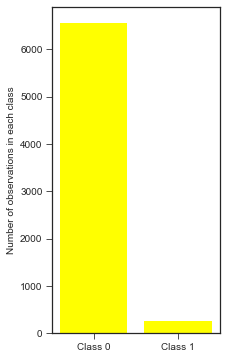

In [16]:
class_0 = []
class_1 = []
for i in prot_epit["class"]:
    if i == 0:
        class_0.append(i)
    else:
        class_1.append(i)
to_plot = [len(class_0), len(class_1)]
classes = ["Class 0", "Class 1"]
import matplotlib.pyplot as plt
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize = (3, 6))
plt.bar(classes, to_plot, color = "#FFFF00")
plt.ylabel('Number of observations in each class')
plt.show()

[10]

Here, we wish to observe the distribution of class. So we make 2 empty lists and update them whenever classes are 0 and 1 respectively. To observe the magnitude of difference between the two length of two lists, we plot it using matplot library of python and obtain the graph suggesting that number of observations in Class 0 is much higher than the number of observations in Class 1.

### (ii) a graphical investigation of the distribution of epitope lengths;


Here, we introduce a new column called epit_len to record the length of each epitope of the database. Further we plot this column to examine its distribution. (Kindly Scroll through the output)

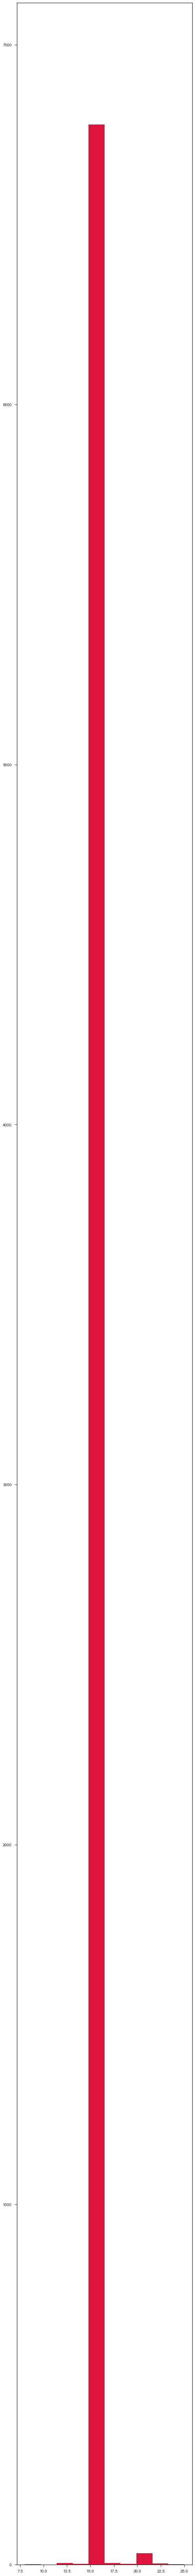

In [17]:
prot_epit["epit_len"] = prot_epit.epit_seq.astype(str).str.len() # [1]
fig = plt.figure(figsize = (8, 120))
plt.style.use("seaborn-notebook")
plt.hist(prot_epit.epit_len, color = "#DC143C")
plt.show()

Here, we see that 99% of of the entries in epit_seq have the same length i.e 15. Rest 1% have different lengths.  [1]

### (iii) A grouped bar chart of the frequencies (%) of each aminoacid letter in
### Positive vs Negative observations.
### Discuss what these visualisations are showing

We need to incorporate multiple functions to get what we want to obtain here. First we need to count the total number of occurances of each letter in epit_seq column. Then we need to group all these occurances according to class and count the number of occurances for each class. As a lot of data is needed, We prefer having a small table to organise everything neatly and in a consistent manner so that we get a nice graph. 

In [18]:
def x_total(x):
    return prot_epit["epit_seq"].str.count(x).sum() # [23]

wad = prot_epit.groupby(["class"])["epit_seq"].sum() # [10]
def let_perc(x):
    return wad.str.count(x)*100

def find_perc(x):
    return let_perc(x)/x_total(x)

list_of_alphabets = ["A","C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y" ]
perc_o = []
perc_i = []
for j in list_of_alphabets:
    x = find_perc(j)
    perc_o.append(x[0])
    perc_i.append(x[1])
df = pd.DataFrame(list(zip(list_of_alphabets, perc_o, perc_i)), columns = ["Alphabets", "Class_0", "Class_1"]) # [11]
df

,Alphabets,Class_0,Class_1
0,A,95.133506,4.866494
1,C,100.000000,0.000000
2,D,94.391304,5.608696
3,E,93.928706,6.071294
4,F,99.619338,0.380662
5,G,98.383838,1.616162
6,H,98.298573,1.701427
7,I,96.910875,3.089125
8,K,94.763978,5.236022
9,L,95.824251,4.175749


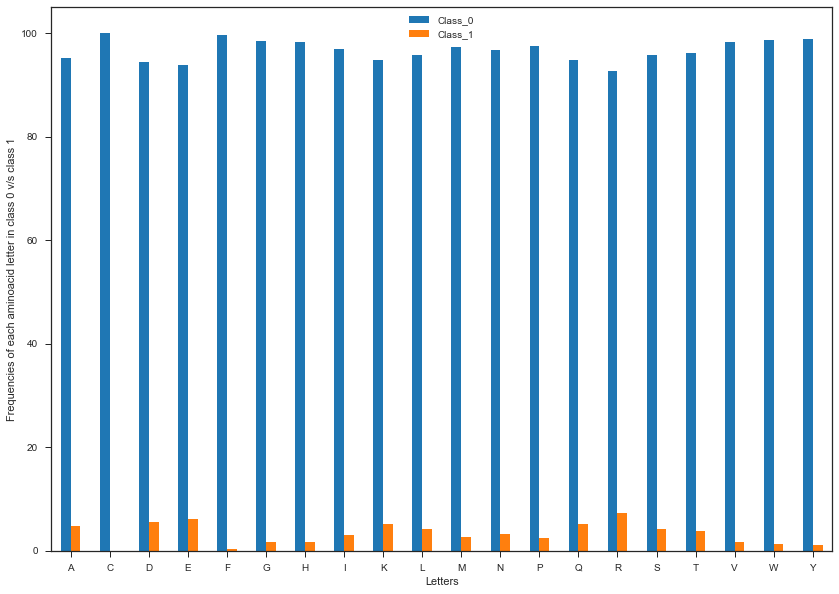

In [19]:
df.plot("Alphabets", ["Class_0", "Class_1"], figsize = (14, 10), kind = "bar")   
plt.style.use("seaborn-poster") # [21]
plt.ylabel("Frequencies of each aminoacid letter in class 0 v/s class 1")
plt.xlabel("Letters")
plt.xticks(rotation=0) 
plt.show()

[10], [11], [23], [21]

For the last part of M5, multiple steps are involved. 
First, we count the total number of occurances for each letter in the the column epit_seq. Then we sort the occurances according to their classes i.e 0 or 1.
We get 2 strings belonging to classes 0 and 1. Now we count the total number of occurances of each letter in the strings followed by finding out how many of them belong to classes 0 and 1. Once we obtain it, we divide it by total number of occurances to obtain the fraction of each alphabet in each class. Once we get all these data, we construct a new dataframe with all the values procured i.e the percentage of alphabets belonging to each class.
Now we plot the graph using the dataframe and matplot library.
What we see in the graph is that the number of observatiobns belonging to class 0 is about 8 times more than the ones belonging to class 1. So there is a huge class imbalance which needs to be rectified.

# M6 
### Based on the resulting data set of (M1)-(M3), assemble an expanded data set, such that each aminoacid of  each epitope sequence is represented in an individual row. This expanded data set must have a new variable called AA_window , containing a substring of length 15 centred on the specific aminoacid.
### Report the dimension of the data after each step.


Here, we need to assemble an expanded dataset such that every amino acid of each epitope sequence gets an individual row. So we need to make a new column which gives seperate rows for each aminoacid while containing a substring of length 15 centred on the specific aminoacid.

In [20]:
prot_epit["AA_position"] = prot_epit.apply(lambda x: list(range(x['start_pos'], x['end_pos']+1)), axis = 1) # [5]
df = prot_epit.explode("AA_position").reset_index(drop = True) # [24]
df.shape #expanded dataset

(102659, 31)

[5], [24]

In [21]:
df[['start_pos', "end_pos", "AA_position", "TSeq_sequence"]]   
df["new_start_pos"] = df["AA_position"]-8
df["new_end_pos"] = df["AA_position"]+7
window = []
for i in df.index:
    a = df.iloc[i]["new_start_pos"]
    b = df.iloc[i]["new_end_pos"]
    c = df.iloc[i]["TSeq_sequence"][a:b]
    window.append(c)
df["AA_window"] = window
m6 = df[["protein_id", "epitope_id", "AA_position", "AA_window", "class"]]
m6.shape

(102659, 5)

Here, we assemble an expanded dataset by applying the functions over the entire table using lambda function, such that each aminoacid of every epitope sequence is represented by an indvidual row. Then we created new rows for new start and end positions such that the AA_position is at a distance of 7 units from both the ends. After that we create a sequence from TSeq_sequence such that AA_position is at dead centre and thus we obtain AA_window using new start and end positions.  [5]
After the explosion, the number of observations expanded so many times. Now we have almost twice the amount of rows we initially had.

# S1
### Report the class imbalance of the expanded data set. To deal with this class imbalance you must keep all ‘positive class’ observations and randomly select 1.5*num_positive number of ‘negative class’ observations from the expanded data set; where num_positive is the number of positive observations.Report the dimension of the data after each step.

First we need to group dataset m6 according to the class of each entry. We find out that the number of entries with class 0 is approximtely 8 times higher that the number of entries with class 1 which makes m6 a highly unstable dataset. We need to randomly delete a large number of entries which belong to class 0 so that we are left with only negative classs entries which are merely 1.5 times the number of positive class entries.

In [22]:
m6.groupby("class")
num_positive = 0
for i in m6["class"]:
    if i == 1:
        num_positive+=1
# randomly select 6150 random observations
neg = m6[m6["class"]==0]
np.random.seed(10)
remove_n = 92409
for k in neg:
    drop_indices = np.random.choice(m6.index, remove_n, replace=False)  # [7]
s1 = m6.drop(drop_indices)
s1.shape

(10250, 5)

[07]

In the expanded dataset we have 4100 observations where class is positive whereas 98,559 observations belongs to the negative class. Here we need to select 4100 * 1.5 i.e 6150 observations which belong to negative class and keep them along with the positive class observations in the expanded dataset. Thus we remove 92409 negative observations. The dimensions of the dataset are reduced to 10250 rows and 5 columns.

# S2
### Calculation of features related to the letters in the AA_window sequences calculated in (M5):
#### - 20 features for the frequency of each individual letter;
#### - 400 features related to the frequency of each possible pair of letters

We need the count of every letter in each entry of AA_window. So we need to construct 20 columns each counting the no of occcurances of those letters in every row of AA_window. Additionally, we need to count the pairs of letters in each row. So we need 400 more columns to record that.

In [23]:
for b in list_of_alphabets:
    m6[b] = m6.AA_window.str.count(b)/15   # [12]
new_columns = []
for x in range(len(list_of_alphabets)):
    for z in range(len(list_of_alphabets)):
        str = list_of_alphabets[x]+list_of_alphabets[z]
        new_columns.append(str) 

import re
for i in new_columns:
    m6[i] = m6.AA_window.str.count(i, re.I)/14  # [8]
m6.shape

(102659, 425)

[12], [8]

We calculatd 20 features for the frequency of each individual letter by iterating through AA_window and counting the occurance of each letter; then dividing it by 15 to obtain the fraction.
For the second part, we make all the possible combinations of letters that is needed; store them in a list and then use regex(for matching) to do the same thing that we did in this question's first part. Only change here is that we divide the resultant by 14.
Counting the letters individually leads to the formation of 20 columns while for the pair of letters, we needed 400 columns to record their respective counts.

# S3
###  Splitting of the expanded dataset into training (80%) and testing (20%) set based on the protein_id value (i.e., all epitopes with the same protein_id should be under the same split) after M5.

Here we need to figure out a way to split the dataset we obtained in m6 into training and testing sets based on protein_id value. We will to apply GroupShuffleSplit while trying to specify test__size and the column we need to split on. We need to find out the percentage of data available in training and test datasets too.

In [24]:
s3 = m6["protein_id"]
from collections import Counter
frequency = Counter(s3)   # [8] 
from sklearn.model_selection import GroupShuffleSplit    # [17]
train_in, test_in = next(GroupShuffleSplit(test_size = 0.20, random_state = 63).split(m6, groups = m6["protein_id"]))
train = m6.iloc[train_in]
test = m6.iloc[test_in]
train_perc = train.size/m6.size
test_perc = test.size/m6.size
arr = [train_perc*100, test_perc*100]
arr

[80.43912370079583, 19.56087629920416]

[8], [17]

Conclusion for S3: Here we are required to keep all the epitopes with same protein_id in the same dataset i.e all of them should be in either test set or all of them should be in training dataset. To follow this order, we use GroupShuffleSplit. It is an Out cross-validation iterator which provides randomized train/test indices to split data according to the conditions set forth by a third-party. This group information can be used to encode arbitrary domain specific stratifications of the samples as integers. GroupShuffleSplit generates a user-determined number of random test splits, each with a user-determined fraction of unique groups.
Here we allocate variables to test data and train data seperately and then we find out the percentage of each after splitting and running the machine learning model.

In [25]:
train.size

35095650

In [26]:
test.size

8534425

We calcuate the percentage of original data present in test and train datasets and obtain the train:test ratio to be approx 80:20. And then we obtain the size for train and test datasets. Train has 2/3rds of the original size while test dataset consists of 1/3rd of the original dataset's size.

# S4
### Fit a classification model using the training set and report the model’s predictive performance. Note the model should only use 420 features from (S2) and the class labels.


We can basically fit any classification model we want to, predict outcomes using the model and measure its accuracy to know how efficient it really is.

In [27]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
y = train["class"].values
X = train.drop(["class", "epitope_id", "AA_position", "AA_window", "protein_id"], axis = 1).values

# set the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 96, test_size = 0.2)
knn = KNeighborsClassifier(n_neighbors=7) 
 
knn.fit(X_train, y_train) 

# Predict on dataset whose model has not been seen before
knn.predict(X_train)  

# Measure accuracy of the model
knn.score(X_test, y_test)  

0.9795349963671591

[09]

Here, we use the training and test datasets obtained in S3. First we drop the columns as required; then we assign it to training and test sets. We predict on the model using knn classifier after fitting it. We measure the accuracy of the model using score. The knn algorithm is 97.9535% accurate.

# C1
### Calculate additional features after (S1):
### Shannon entropy of AA_window.
### - TMM and MHI of AA_window.[Note: TMM is calculated as the weighted sum of the letter counts in AA_window, with weights being given by column Molecular mass (Da) in the table provided in the footnote. MHI is calculated as the weighted arithmetic mean of the letter counts in AA_window, with weights being given by column Hydropathy index in the table provided on the footnote.]
### Total number of Carbon, Hydrogen, Oxygen, Nitrogen and Sulphur atoms in AA_window. [Note: this is calculated as a weighted sum of the count of each letter in AA_window, with the weight of each letter being given by the respective column in the table provided]

This question has 2 parts. First, we make a function to find shannon entropy [06] and then introduce a column for the same.

In [28]:
import math
from collections import Counter

def eta(data, unit='natural'):
    base = {
        'shannon' : 2.,
        'natural' : math.exp(1),
        'hartley' : 10.
    }

    if len(data) <= 1:
        return 0

    counts = Counter()

    for d in data:
        counts[d] += 1

    ent = 0

    probs = [float(c) / len(data) for c in counts.values()]
    for p in probs:
        if p > 0.:
            ent -= p * math.log(p, base[unit])

    return ent # [24]
dna_sequence = s1["AA_window"]
x = []
for i in dna_sequence:
    x.append(eta(i))
s1["shannon_entropy"]  = x
s1.head()

,protein_id,epitope_id,AA_position,AA_window,class,shannon_entropy
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,2.523211
11,AAK33481.1,511327,17,VTSVALSLVPLATAQ,0,1.864044
21,AAK33481.1,511327,27,LATAQAQEWTPRSVT,0,2.176186
24,AAK33481.1,511425,92,PDTILTANYNQHGQA,0,2.338372
32,AAK33481.1,511425,100,YNQHGQATNLTVQAP,0,2.211069


We need to go through each string in the AA_window and calculate the prior probability to use it to find shannon entropy.
Here eta is the function which outputs shannon entropy of the column AA_window. We record the shannon entropies of all the entries in the AA_windows in an empty list x, and then assign this list to a new column called shannon entropy in the table s1.

For the next part we first hardcode the entire table then construct dictionaries out of the necessary columns to draw new conclusions.(I have no idea why I made the dataframes. The tables aren't required, the columns are.) The process is similar to how we calculated the shannon entropy of AA_window.   [22]

In [29]:
amino_acid = ["Alanine", "Arginine", "Asparagine", "Aspartic acid", "Cysteine", "Glutamine", "Glutamic Acid", "Glycine", "Histidine", "Isoleucine", "Leucine", "Lysine", "Methionine", "Phenylalanine", "Proline", "Serine", "Threonine", "Tryptophan", "Tyrosine", "Valine"]
abbreviations = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
molecular_mass = [89, 174, 132, 133, 121, 146, 147, 75, 155, 131, 131, 146, 149, 165, 115, 105, 119, 204, 181, 117]
no_of_atoms = [13, 26, 17, 16, 14, 20, 19, 10, 20, 22, 22, 24, 20, 23, 17, 14, 17, 27, 24, 19]
volume = [88.6, 173.4, 114.1, 111.1, 108.5, 143.8, 138.4, 60.1, 153.2, 166.7, 166.7, 168.6, 162.9, 189.9, 112.7, 89.0, 116.1, 227.8, 193.6, 140.0]
hydropathy_index = [1.8, -4.5, -3.5, -3.5, 2.5, -3.5, -3.5, -0.4, -3.2, 4.5, 3.8, -3.9, 1.9, 2.8, -1.6, -0.8, -0.7, -0.9, -1.3, 4.2]
df_helper1 = pd.DataFrame(list(zip(amino_acid, abbreviations, molecular_mass, no_of_atoms, volume, hydropathy_index)), columns = ["Amino Acid", "Abbreviations", "Molecular Mass (DA)", "Number Of Atoms", "Volume", "Hydropathy Index"])

In [30]:
d = {abbreviations[i]: molecular_mass[i] for i in range(len(abbreviations))}

a = [i for i in s1["AA_window"]]
def sum_window(z):
    x  = [d[j] for j in z]
    sum = 0
    for i in x:
        sum += i
    return sum
b = [sum_window(k) for k in a]
s1["tmm"] = b

What we did here is first hardcode the entire table which was provided in the link attatched to the assignment. We were required to traverse each string of AA_window and calcualte the sum according to the number associated with every letter. So we make a dictionary d here which contains molecular masses and the abbreviations. i.e the columns required in this question.
After this we make a list which contains all the entries of AA_window so that it could be incorporated into a function where we add the numbers associated with each letter. We run this function through the entire column of AA_window and store the resultant list in a variable. Then we assign this variable into a brand new row called tmm which belongs to table s1.

In [31]:
d = {abbreviations[i]: hydropathy_index[i] for i in range(len(abbreviations))}

a = [i for i in s1["AA_window"]]
def mean_window(z):
    x  = [d[j] for j in z]
    sum = 0
    for i in x:
        sum += i
    return sum/len(z)
b = [mean_window(k) for k in a]
s1["mhi"] = b

What we did for tmm, we do exactly the same stuff and apply exactly the same logic for rest of the parts of this question(in addition to dividing the result by the length of the string for mhi). Also we make different dictionaries for abbreviations and columns as required here. And yes, we hardcode a table for all the elements too.

In [32]:
AA_Code = ["A","C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"]
Carbon = [3, 3, 4, 5, 9, 2, 6, 6, 6, 6, 5, 4, 5, 5, 6, 3, 4, 5, 11, 9]
Hydrogen = [7, 7, 7, 9, 11, 5, 9, 13, 14, 13, 11, 8, 9, 10, 14, 7, 9, 11, 12, 11]
Nitrogen = [ 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 1, 2, 4, 1, 1, 1, 2, 1]
Oxygen = [ 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 3]
Sulphur = [ 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
df_helper2 = pd.DataFrame(list(zip(AA_Code, Carbon, Hydrogen, Nitrogen, Oxygen, Sulphur)), columns = ["AA Code", "Carbon", "Hydrogen", "Nitrogen", "Oxygen", "Sulphur"])

In [33]:
d = {AA_Code[i]: Carbon[i] for i in range(len(AA_Code))} 

a = [i for i in s1["AA_window"]]
def sum_window(z):
    x  = [d[j] for j in z]
    sum = 0
    for i in x:
        sum += i
    return sum
b = [sum_window(k) for k in a]
s1["Carbon content"] = b

In [34]:
d = {AA_Code[i]: Hydrogen[i] for i in range(len(AA_Code))} 

a = [i for i in s1["AA_window"]]
def sum_window(z):
    x  = [d[j] for j in z]
    sum = 0
    for i in x:
        sum += i
    return sum
b = [sum_window(k) for k in a]
s1["Hydrogen content"] = b

In [35]:
d = {AA_Code[i]: Nitrogen[i] for i in range(len(AA_Code))}  

a = [i for i in s1["AA_window"]]
def sum_window(z):
    x  = [d[j] for j in z]
    sum = 0
    for i in x:
        sum += i
    return sum
b = [sum_window(k) for k in a]
s1["Nitrogen content"] = b

In [36]:
d = {AA_Code[i]: Oxygen[i] for i in range(len(AA_Code))} 

a = [i for i in s1["AA_window"]]
def sum_window(z):
    x  = [d[j] for j in z]
    sum = 0
    for i in x:
        sum += i
    return sum
b = [sum_window(k) for k in a]
s1["Oxygen content"] = b

In [37]:
d = {AA_Code[i]: Sulphur[i] for i in range(len(AA_Code))}   

a = [i for i in s1["AA_window"]]
def sum_window(z):
    x  = [d[j] for j in z]
    sum = 0
    for i in x:
        sum += i
    return sum
b = [sum_window(k) for k in a]
s1["Sulphur content"] = b
s1.head()

,protein_id,epitope_id,AA_position,AA_window,class,shannon_entropy,tmm,mhi,Carbon content,Hydrogen content,Nitrogen content,Oxygen content,Sulphur content
1,AAB20743.1,114463,43,KFFEIDLTSRPAHGG,1,2.523211,1925,-0.453333,76,143,21,36,0
11,AAK33481.1,511327,17,VTSVALSLVPLATAQ,0,1.864044,1720,1.420000,66,144,16,35,0
21,AAK33481.1,511327,27,LATAQAQEWTPRSVT,0,2.176186,1909,-0.466667,72,143,21,38,0
24,AAK33481.1,511425,92,PDTILTANYNQHGQA,0,2.338372,1893,-0.900000,70,135,21,39,0
32,AAK33481.1,511425,100,YNQHGQATNLTVQAP,0,2.211069,1892,-0.920000,70,136,22,38,0


The same procedure is carried out for all the gaseous elements here as we did  for tmm. We simply make different dictionaries according to the molecules of gases we need to count. And keep on adding the columns to the s1 table.

# C2
### Develop only three high-quality visualisations of the main characteristics of the results from (C1)

We have to develop 3 visualisations using the new columns we added in the table S1. So, we will develop 3 different kinds of graphs plotting different pairs of columns against each other or plotting a column individually. [20], [19], [18], [16]

Text(0, 0.5, 'Number of Molecules')

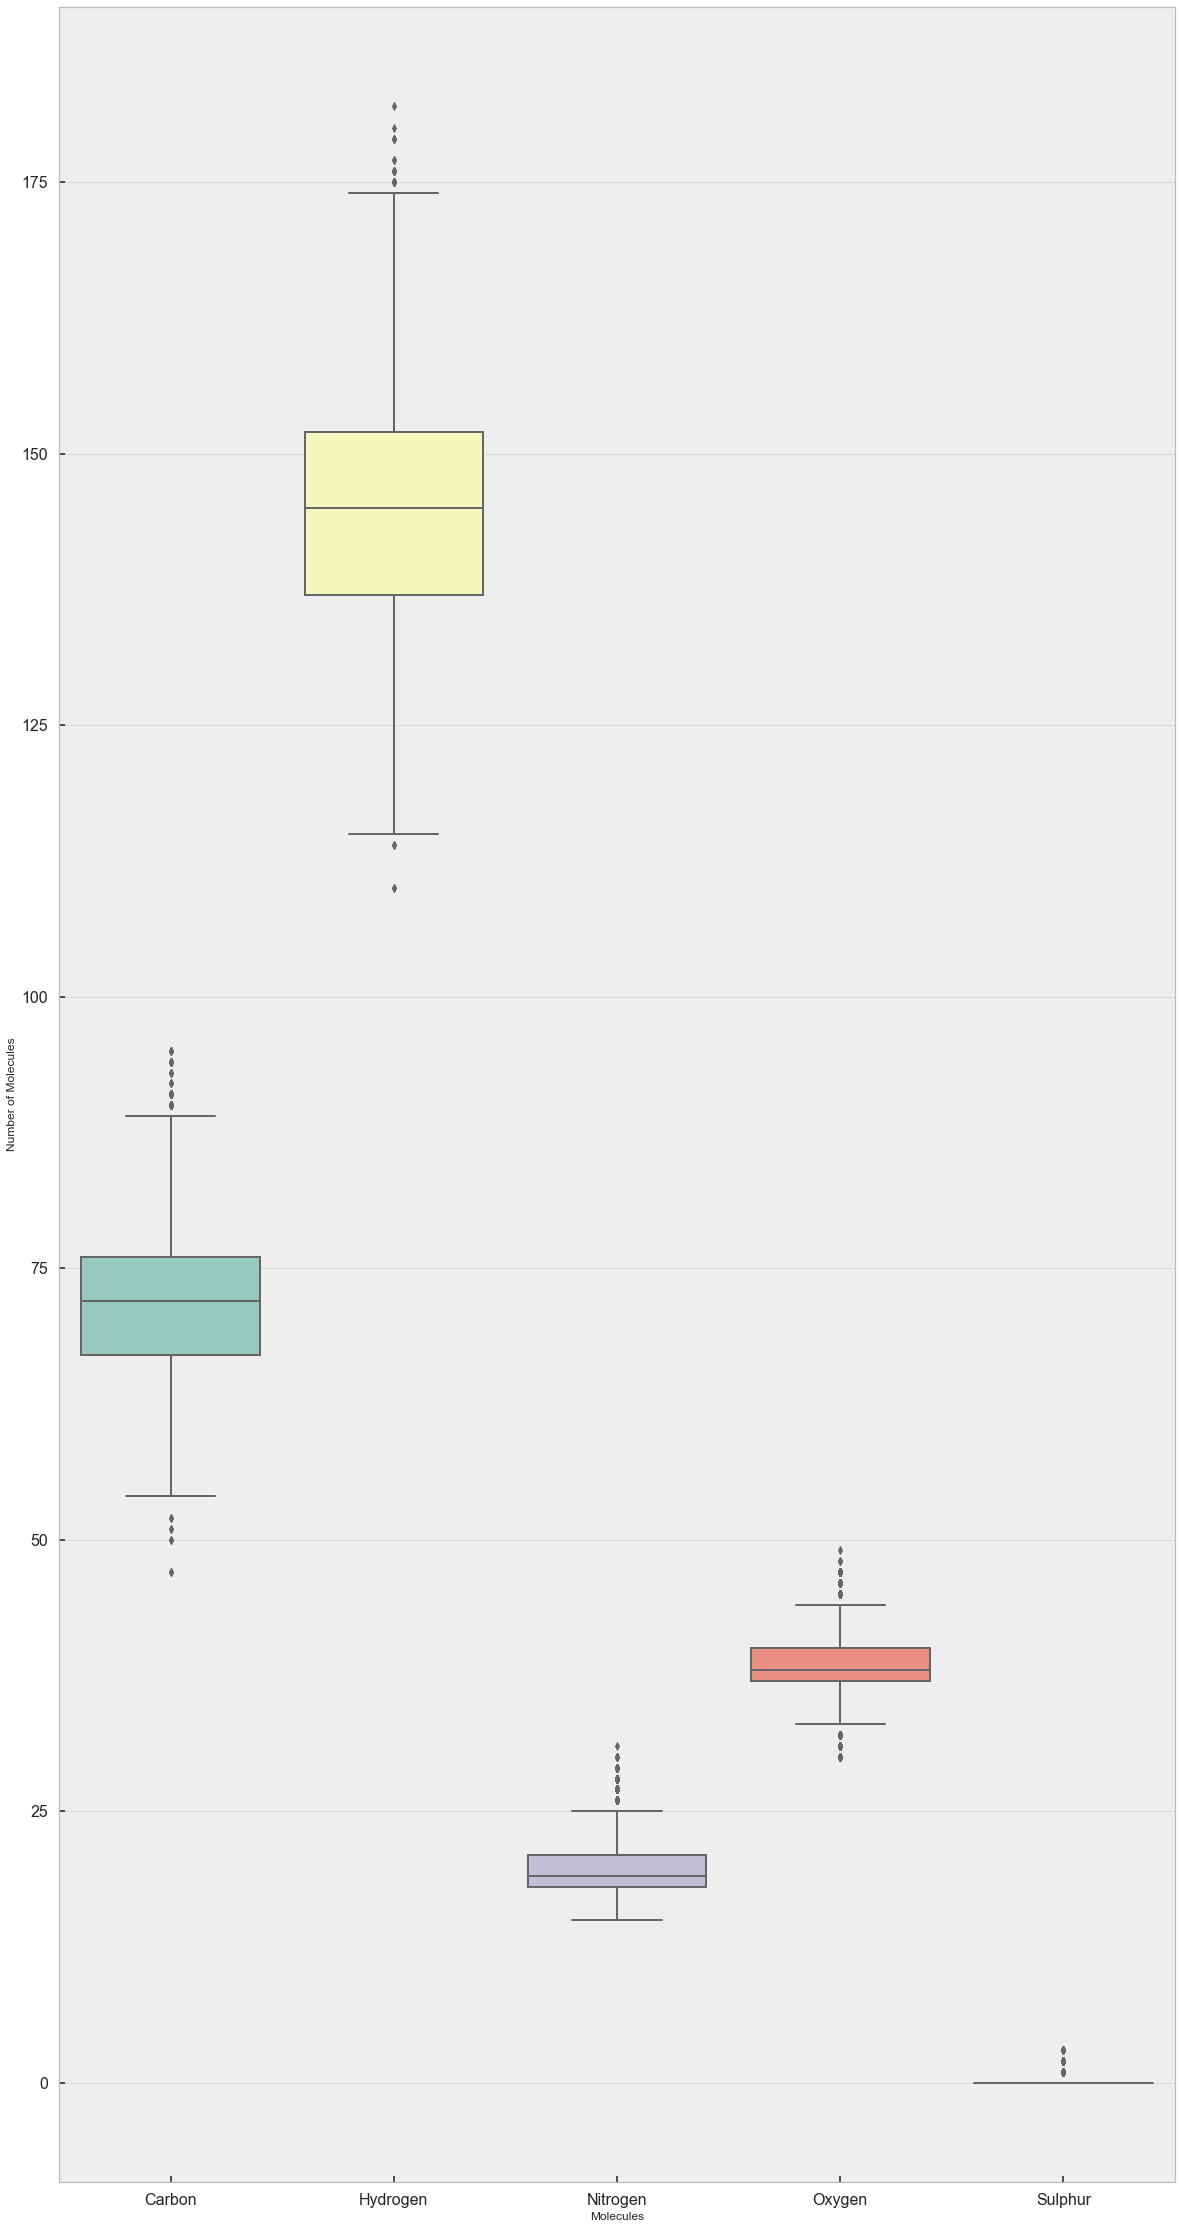

In [38]:
to_plot = pd.DataFrame({"Carbon": s1["Carbon content"], "Hydrogen": s1["Hydrogen content"], "Nitrogen": s1["Nitrogen content"], "Oxygen": s1["Oxygen content"], "Sulphur": s1["Sulphur content"]})
to_plot_melted = pd.melt(to_plot)
fig = plt.figure(figsize = (20, 40))
import seaborn as sns
plt.style.use('bmh')
sns.boxplot(x='variable', y='value', data=to_plot_melted, palette="Set3")
plt.xlabel("Molecules")
plt.ylabel("Number of Molecules")

We develop a boxplot to compare the amount of all the gaseous molecules. First we melted the rows of all 5 gases into 1 row and created a new dataframe. We then plot the dataframe thus obtained using boxplot. Kindly scroll through the entire figure.

[20]

Text(0, 0.5, 'TMM')

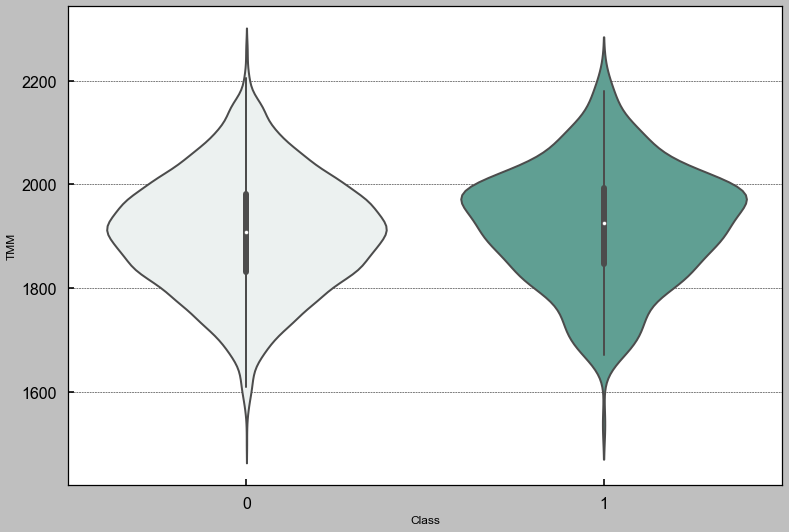

In [39]:
plt.style.use('grayscale')
sns.violinplot(data=s1, x="class", y="tmm", palette="light:#5A9")
plt.xlabel("Class")
plt.ylabel("TMM")

Then we develop a joint plot to understand the distribution of tmm against class. Coz we are fascinated to compare every column.

[18], [19]

Text(0.5, 0, 'Variables')

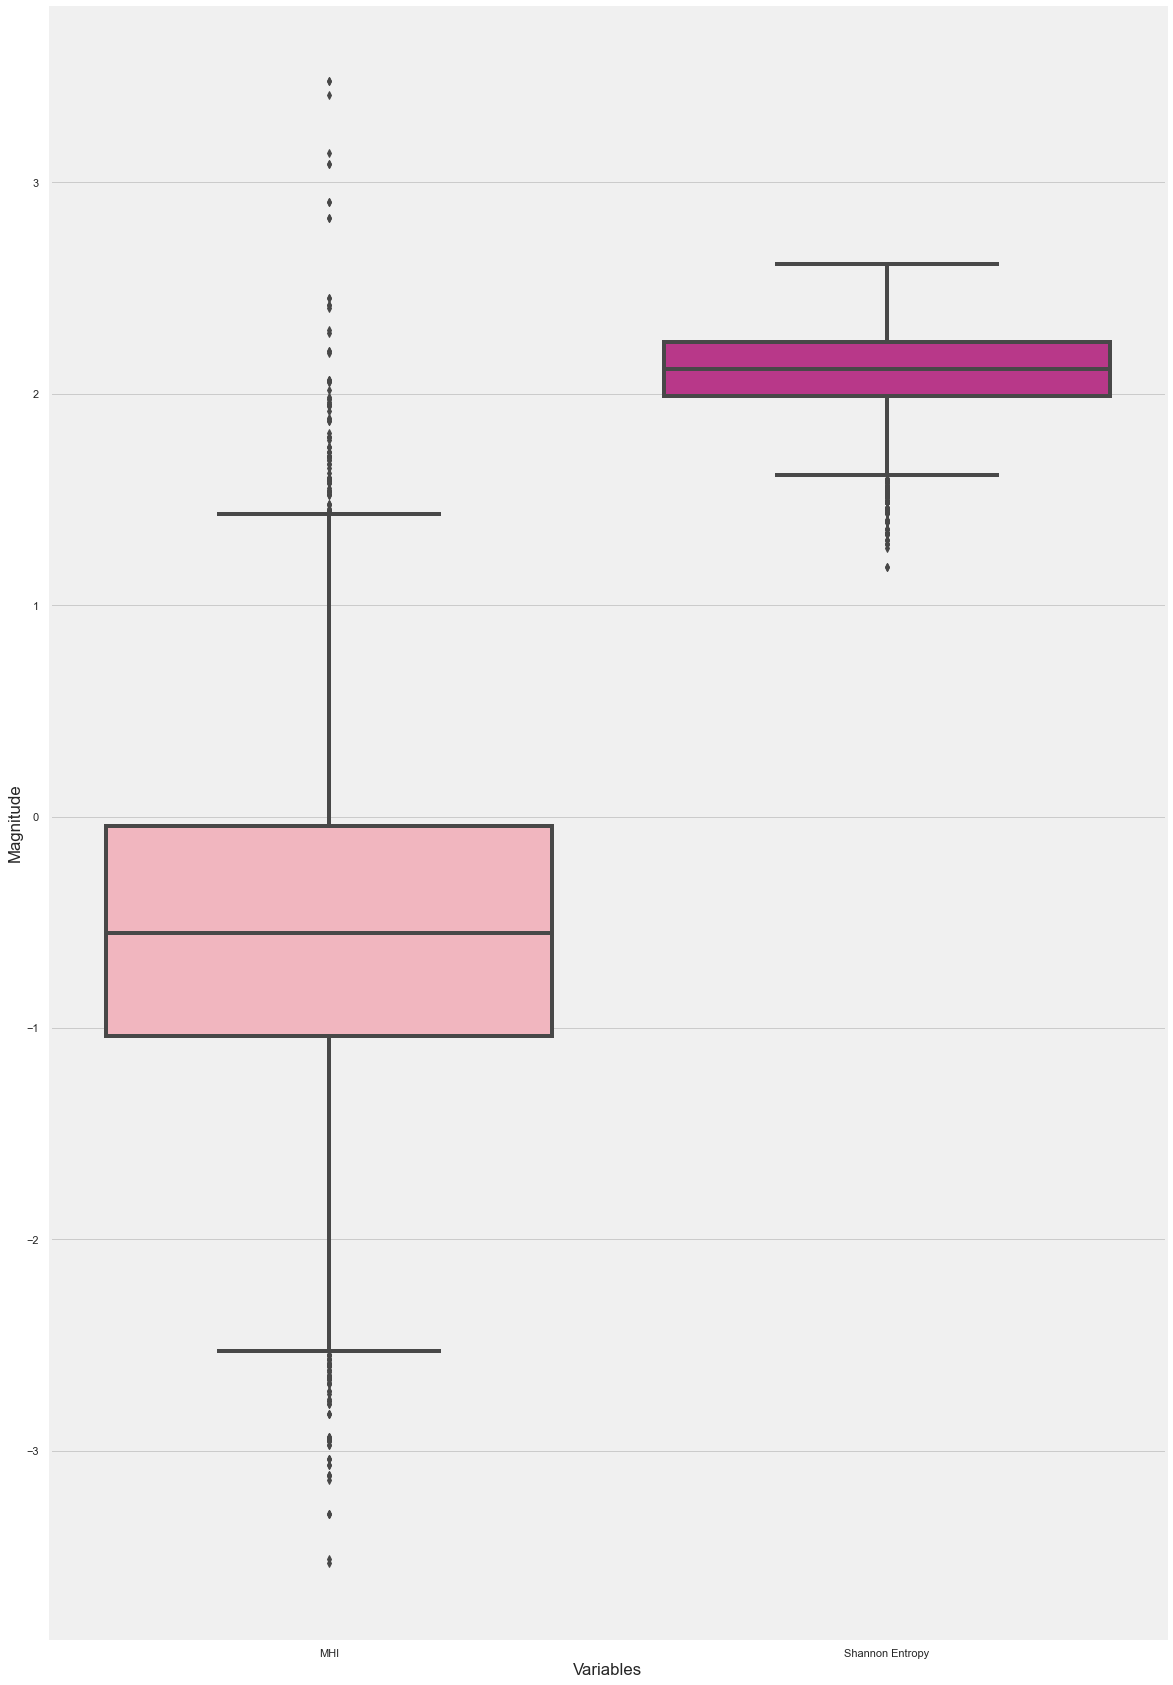

In [40]:
last_plot = pd.DataFrame({"MHI": s1["mhi"], "Shannon Entropy": s1["shannon_entropy"]})
last_plot_melted = pd.melt(last_plot)
sns.set_theme(style="ticks", palette="pastel")
fig = plt.figure(figsize = (20, 30))
plt.style.use('fivethirtyeight')
sns.boxplot(x='variable', y='value', data=last_plot_melted, palette="RdPu")
plt.ylabel("Magnitude")
plt.xlabel("Variables")

At last, We take a look at the ranges of shannon entropy and MHI using boxplot.

[16]  

Thus, We compare and contrast the content of different elements to each other using different graphs offered by seaborn.

## Summary

We go through a rollercoaster ride of cleaning and analysing data, building machine learning models and visualising the data in this assignment. As we define the problem at the beginning of each question, we conclude the answers at the bottom of every code in which we solve the problem and draw necessary deductions.

## Reference

[01] Beny, stackoverflow.com, [online], 21 February 2022, (https://stackoverflow.com/questions/70248604/count-string-lengths-in-pandas-dataframe-column

[02] Bhutani, K.(2021), geeksforgeeks.org, [online], 20 February 2022, (https://www.geeksforgeeks.org/python-pandas-series-str-cat-to-concatenate-string/#:~:text=Pandas%20str.cat()%20is,from%20the%20Python's%20default%20method)

[03] Bhutani, K.(2020), geeksforgeeks.org, [online], 20 February 2022, (https://www.geeksforgeeks.org/python-pandas-dataframe-loc/)

[04] Bhutani, K.(2018), geeksforgeeks.org, [online], 20 February 2022, (https://www.geeksforgeeks.org/python-delete-rows-columns-from-dataframe-using-pandas-drop/)

[05] Bhutani, K.(2018), geeksforgeeks.org, [online], 22 February 2022, (https://www.geeksforgeeks.org/python-pandas-apply/)

[06] blamblambunny, stackoverflow.com, [online], 27 March 2022, (https://stackoverflow.com/questions/15450192/fastest-way-to-compute-entropy-in-python)

[07] Cel, B.(2015), stackoverflow.com, [online], 22 February 2022, (https://stackoverflow.com/questions/28556942/pandas-remove-rows-at-random-without-shuffling-dataset)

[08] collections - Container datatypes, docs.pytho.org, [online], 15 March 2022, (https://docs.python.org/3/library/collections.html)

[09] Datacamp commmunity(2016), datacamp.com, [online], 26 March 2022, (https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn)

[10] Friedman, D.(2018), dfrieds.com, [online], 21 February 2022, (https://dfrieds.com/data-analysis/groupby-python-pandas.html)

[11] Gupta, A.(2019), stackoverflow.com, [online], 21 February 2022, (https://stackoverflow.com/questions/30522724/take-multiple-lists-into-dataframe)

[12] Hayden, A.(2013), stackoverflow.com, [online], 22 February 2022, (https://stackoverflow.com/questions/17573814/count-occurrences-of-each-of-certain-words-in-pandas-dataframe)

[13] Pawki, (2020), geeksforgeeks.org, [online], 20 February 2022, (https://www.geeksforgeeks.org/different-types-of-joins-in-pandas/)

[14] Ranjan, S.(2021), geeksforgeeks.org, [online], 20 February 2022, (https://www.geeksforgeeks.org/python-pandas-series-str-contains/)

[15] Ranjan, S.(2019), geeksforgeeks.org, [online], 20 February 2022, (https://www.geeksforgeeks.org/python-pandas-dataframe-loc/)

[16] Rustagy, D.(2020), geeksforgeeks.org, [online], 28 March 2022, (https://www.geeksforgeeks.org/python-seaborn-jointplot-method/)

[17] Scikit-learn developers (2018), scikit-learn.org, [online], 17 March 2022, (https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html)

[18] Seaborn Distplot documentation, seaborn.pydata.org,  [online], 21 March 2022,(https://seaborn.pydata.org/generated/seaborn.distplot.html)

[19] Seaborn Distplot documentation, seaborn.pydata.org,  [online], 21 March 2022,(https://seaborn.pydata.org/generated/seaborn.distplot.html)

[20] Seaborn Kdeplot documentation, seaborn.pydata.org, [online], 21 March 2022, (https://seaborn.pydata.org/generated/seaborn.kdeplot.html)

[21] tonysyu, (2016), GitHub, [online], 22 February 2022, (http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html)

[22] Singh, M.(2018), geeksforgeeks.org, [online], 20 March 2022, (https://www.geeksforgeeks.org/python-convert-two-lists-into-a-dictionary/)

[23] Ulhaq, M.(2009), stackoverflow.com, [online], 21 February 2022, (https://stackoverflow.com/questions/1155617/count-the-number-of-occurrences-of-a-character-in-a-string)

[24] Zach, (2021), stackoverflow.com, [online], 22 February 2022, (https://www.statology.org/pandas-explode/)












